# Unit 3 Capstone 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
import matplotlib.patches as mpatches

## The Dataset

This data can be found on Kaggle https://www.kaggle.com/passnyc/data-science-for-good#2016%20School%20Explorer.csv and was provided by PASSNYC. The dataset includes 1272 schools in the New York City area. The purpose for the data is to find the schools that need the most attention. The test scores are from a test called SHSAT, which is a high school admission examination given to student before acceptance into one of the city's specialized high schools among the eight that require this test. This test is only given to eighth and nineth grade students. Only students that wish to attend the more prestigious more specialized schools will have to take the SHSAT. I also one to mention that the definition used for rigorous instruction is a little different from how I would normally use it and I wanted to clarify their definition. The school dataset provider's definition for rigorous instruction is how well the students were engaged during the curriculum.

In [2]:
df = pd.read_csv('2016 School Explorer.csv')

## Exploring the dataset

In [3]:
df.head()

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,P.S. 034 FRANKLIN D. ROOSEVELT,310100010034,01M034,1,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",...,48,1,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,THE STAR ACADEMY - P.S.63,310100010063,01M063,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.describe()

,SED Code,District,Latitude,Longitude,Zip,Economic Need Index,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
count,1.272000e+03,1272.00000,1272.000000,1272.000000,1272.000000,1247.000000,1217.000000,1217.000000,1272.000000,1272.000000,...,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,3.286698e+11,16.13522,40.734537,-73.918347,10815.720912,0.672281,2.534215,2.668956,60.569182,4.952830,...,43.841195,4.911950,0.003145,0.610063,0.947327,1.984277,0.970912,0.002358,0.159591,2.992138
std,1.222022e+10,9.24527,0.086602,0.080576,529.588875,0.210959,0.363589,0.470470,57.872496,8.300568,...,82.878780,20.792371,0.068635,3.966083,4.056007,12.841333,6.880223,0.084116,1.321195,12.694124
min,3.075000e+11,1.00000,40.507803,-74.244025,10001.000000,0.049000,1.810000,1.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.208752e+11,9.00000,40.669499,-73.957057,10452.000000,0.550000,2.250000,2.300000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.315004e+11,15.00000,40.722995,-73.920571,11203.000000,0.731000,2.450000,2.580000,54.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.424000e+11,24.00000,40.815632,-73.879264,11232.000000,0.841000,2.760000,2.980000,94.000000,7.000000,...,59.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.531009e+11,32.00000,40.903455,-73.708920,11694.000000,0.957000,3.930000,4.200000,356.000000,55.000000,...,652.000000,312.000000,2.000000,107.000000,71.000000,246.000000,126.000000,3.000000,33.000000,196.000000


In [5]:
null_count = df.isnull().sum()
null_count[null_count>0]

Adjusted Grade                            1270
New?                                      1245
Other Location Code in LCGMS              1271
Economic Need Index                         25
School Income Estimate                     396
Student Attendance Rate                     25
Percent of Students Chronically Absent      25
Rigorous Instruction %                      25
Rigorous Instruction Rating                 76
Collaborative Teachers %                    25
Collaborative Teachers Rating               76
Supportive Environment %                    25
Supportive Environment Rating               80
Effective School Leadership %               25
Effective School Leadership Rating          73
Strong Family-Community Ties %              25
Strong Family-Community Ties Rating         73
Trust %                                     25
Trust Rating                                73
Student Achievement Rating                  86
Average ELA Proficiency                     55
Average Math 

In [6]:
new_df = df.drop(['Adjusted Grade', 'New?', 'Other Location Code in LCGMS', 'School Income Estimate'], axis = 1)

In [7]:
# If I were doing the PASSNYC challenge I would not be dropping the NANs because I would potentially be skipping possible schools that need extra help
school_df = new_df.dropna(how = 'any')

In [8]:
# Just to make sure we did not lose too many schools 
school_df.describe()

,SED Code,District,Latitude,Longitude,Zip,Economic Need Index,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
count,1.167000e+03,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,...,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000
mean,3.289266e+11,16.347044,40.733421,-73.917970,10822.582691,0.671889,2.530566,2.661140,61.431877,4.910883,...,46.921165,5.257926,0.003428,0.644387,0.998286,2.130249,1.058269,0.002571,0.172237,3.185947
std,1.217964e+10,9.213517,0.087858,0.082117,527.119519,0.211649,0.359010,0.462522,59.090043,8.308107,...,85.047009,21.607987,0.071652,4.104491,4.127263,13.375440,7.176890,0.087818,1.377465,13.164504
min,3.101000e+11,1.000000,40.507803,-74.244025,10001.000000,0.059000,1.810000,1.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.209000e+11,9.000000,40.668042,-73.957176,10453.000000,0.549000,2.250000,2.300000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.316000e+11,16.000000,40.720412,-73.920032,11203.000000,0.732000,2.450000,2.570000,55.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.424000e+11,25.000000,40.816183,-73.879092,11232.500000,0.842000,2.750000,2.980000,96.500000,6.000000,...,66.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.531009e+11,32.000000,40.903455,-73.708920,11694.000000,0.957000,3.930000,4.190000,356.000000,55.000000,...,652.000000,312.000000,2.000000,107.000000,71.000000,246.000000,126.000000,3.000000,33.000000,196.000000


In [9]:
school_df['Supportive Environment %'] = school_df['Supportive Environment %'].str.replace('%', '')
school_df['Supportive Environment %'] = school_df['Supportive Environment %'].astype(float)

C:\Users\blindside\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\blindside\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Exploring continued with graphs

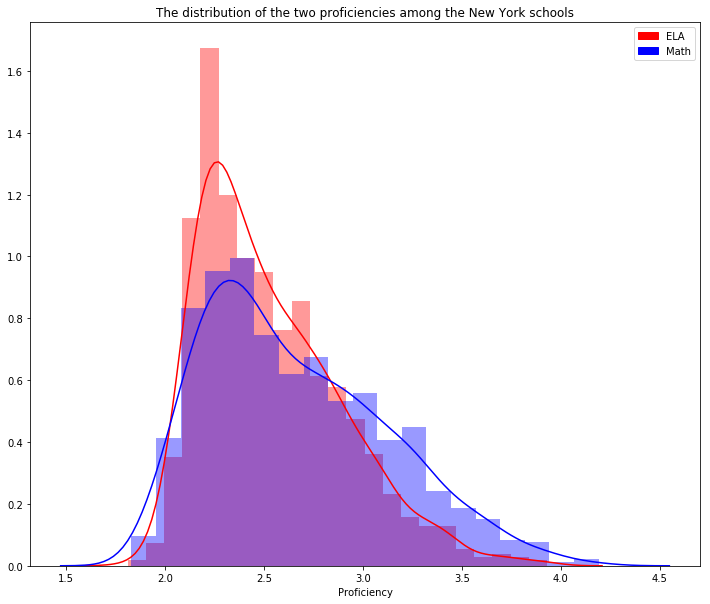

In [16]:
plt.figure(figsize=(12, 10))
sns.distplot(school_df['Average ELA Proficiency'], color = 'red')
plt.title('The distribution of the two proficiencies among the New York schools')
sns.distplot(school_df['Average Math Proficiency'], color = 'blue')
plt.xlabel('Proficiency')
ela_label = mpatches.Patch(color='red', label='ELA')
math_label = mpatches.Patch(color='blue', label='Math')

plt.legend(handles=[ela_label, math_label])
plt.show()

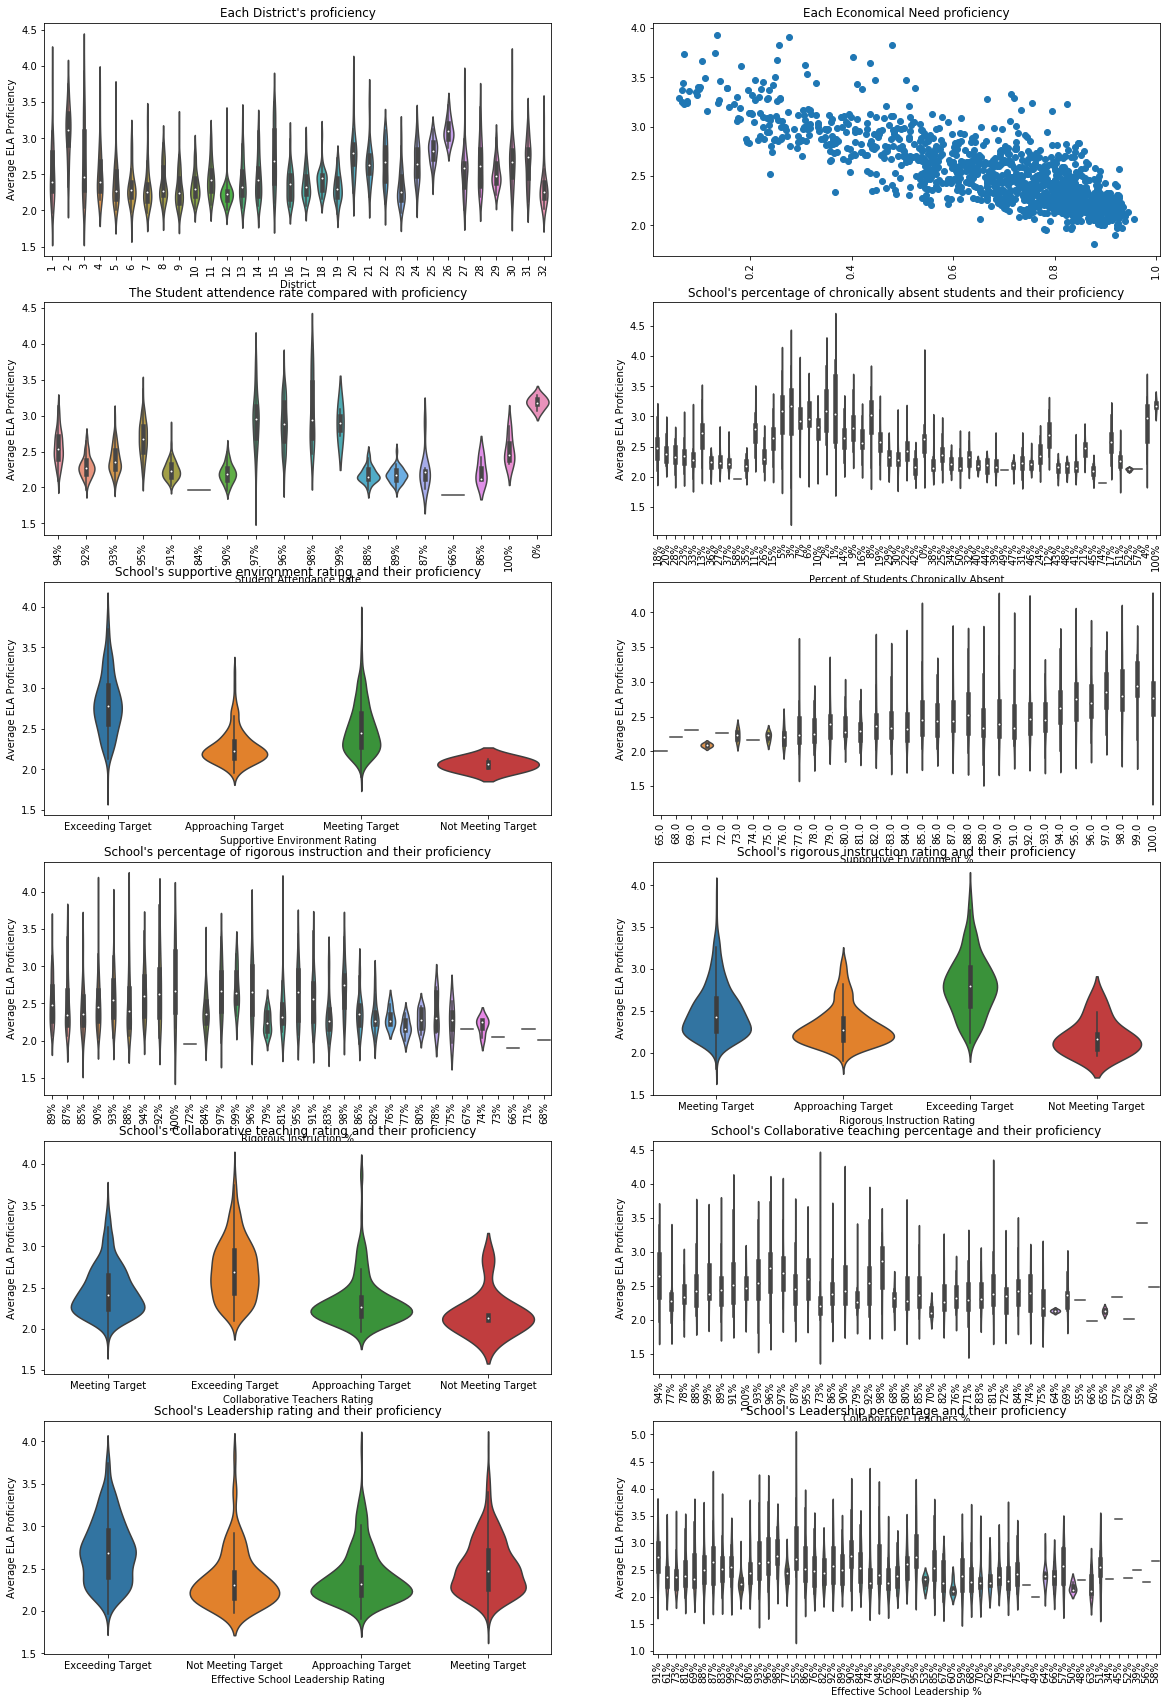

In [11]:
plt.figure(figsize=(20, 30))
plt.subplot(6,2,1)
plt.title("Each District's proficiency")
sns.violinplot(school_df['District'], school_df['Average ELA Proficiency'])
plt.xticks(rotation = 90)

plt.subplot(6,2,2)
plt.title("Each Economical Need proficiency")
plt.scatter(school_df['Economic Need Index'], school_df['Average ELA Proficiency'])
plt.xticks(rotation = 90)

plt.subplot(6,2,3)
plt.title("The Student attendence rate compared with proficiency")
sns.violinplot(school_df['Student Attendance Rate'], school_df['Average ELA Proficiency'])
plt.xticks(rotation = 90)

plt.subplot(6,2,4)
plt.title("School's percentage of chronically absent students and their proficiency")
sns.violinplot(school_df['Percent of Students Chronically Absent'], school_df['Average ELA Proficiency'])
plt.xticks(rotation = 90)
plt.subplot(6,2,5)
plt.title("School's supportive environment rating and their proficiency")
sns.violinplot(school_df['Supportive Environment Rating'], school_df['Average ELA Proficiency'])
plt.subplot(6,2,6)
sns.violinplot(school_df['Supportive Environment %'], school_df['Average ELA Proficiency'])
plt.xticks(rotation = 90)
plt.subplot(6,2,7)
plt.title("School's percentage of rigorous instruction and their proficiency")
sns.violinplot(school_df['Rigorous Instruction %'], school_df['Average ELA Proficiency'])
plt.xticks(rotation = 90)

plt.subplot(6,2,8)
plt.title("School's rigorous instruction rating and their proficiency")
sns.violinplot(school_df['Rigorous Instruction Rating'], school_df['Average ELA Proficiency'])

plt.subplot(6,2,9)
plt.title("School's Collaborative teaching rating and their proficiency")
sns.violinplot(school_df['Collaborative Teachers Rating'], school_df['Average ELA Proficiency'])

plt.subplot(6,2, 10)
plt.title("School's Collaborative teaching percentage and their proficiency")
sns.violinplot(school_df['Collaborative Teachers %'], school_df['Average ELA Proficiency'])
plt.xticks(rotation = 90)

plt.subplot(6,2, 11)
plt.title("School's Leadership rating and their proficiency")
sns.violinplot(school_df['Effective School Leadership Rating'], school_df['Average ELA Proficiency'])

plt.subplot(6,2,12)
plt.title("School's Leadership percentage and their proficiency")
sns.violinplot(school_df['Effective School Leadership %'], school_df['Average ELA Proficiency'])
plt.xticks(rotation = 90)

plt.show()

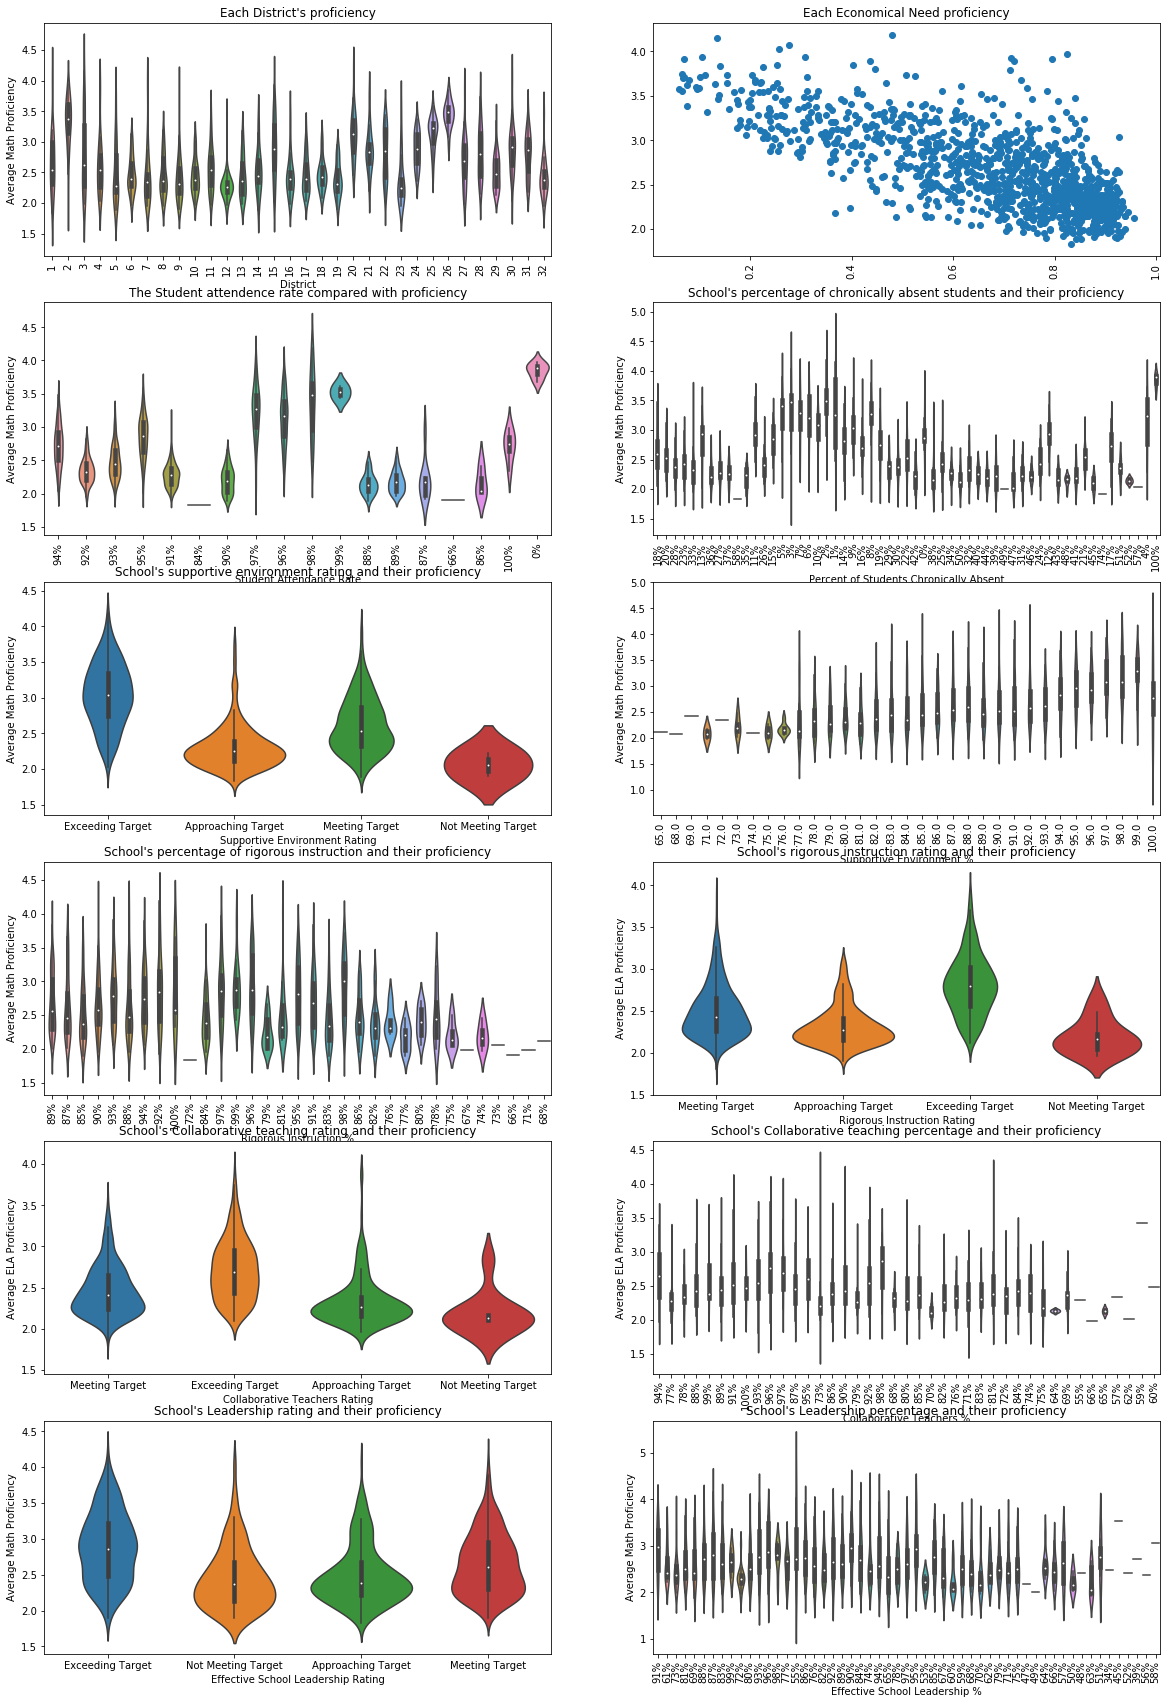

In [13]:
plt.figure(figsize=(20, 30))
plt.subplot(6,2,1)
plt.title("Each District's proficiency")
sns.violinplot(school_df['District'], school_df['Average Math Proficiency'])
plt.xticks(rotation = 90)

plt.subplot(6,2,2)
plt.title("Each Economical Need proficiency")
plt.scatter(school_df['Economic Need Index'], school_df['Average Math Proficiency'])
plt.xticks(rotation = 90)

plt.subplot(6,2,3)
plt.title("The Student attendence rate compared with proficiency")
sns.violinplot(school_df['Student Attendance Rate'], school_df['Average Math Proficiency'])
plt.xticks(rotation = 90)

plt.subplot(6,2,4)
plt.title("School's percentage of chronically absent students and their proficiency")
sns.violinplot(school_df['Percent of Students Chronically Absent'], school_df['Average Math Proficiency'])
plt.xticks(rotation = 90)

plt.subplot(6,2,5)
plt.title("School's supportive environment rating and their proficiency")
sns.violinplot(school_df['Supportive Environment Rating'], school_df['Average Math Proficiency'])

plt.subplot(6,2,6)
sns.violinplot(school_df['Supportive Environment %'], school_df['Average Math Proficiency'])
plt.xticks(rotation = 90)

plt.subplot(6,2,7)
plt.title("School's percentage of rigorous instruction and their proficiency")
sns.violinplot(school_df['Rigorous Instruction %'], school_df['Average Math Proficiency'])
plt.xticks(rotation = 90)

plt.subplot(6,2,8)
plt.title("School's rigorous instruction rating and their proficiency")
sns.violinplot(school_df['Rigorous Instruction Rating'], school_df['Average ELA Proficiency'])

plt.subplot(6,2,9)
plt.title("School's Collaborative teaching rating and their proficiency")
sns.violinplot(school_df['Collaborative Teachers Rating'], school_df['Average ELA Proficiency'])

plt.subplot(6,2, 10)
plt.title("School's Collaborative teaching percentage and their proficiency")
sns.violinplot(school_df['Collaborative Teachers %'], school_df['Average ELA Proficiency'])
plt.xticks(rotation = 90)

plt.subplot(6,2, 11)
plt.title("School's Leadership rating and their proficiency")
sns.violinplot(school_df['Effective School Leadership Rating'], school_df['Average Math Proficiency'])

plt.subplot(6,2,12)
plt.title("School's Leadership percentage and their proficiency")
sns.violinplot(school_df['Effective School Leadership %'], school_df['Average Math Proficiency'])
plt.xticks(rotation = 90)

plt.show()